# **Exercise: Real-World Data Cleaning, Transformation, and Visualization**

**Objective:** The objective of this exercise is to provide hands-on experience with real-world data preprocessing and visualization. The goal is to understand the challenges of cleaning, transforming, and visualizing data to derive valuable insights.

**Instructions:** Refer to pdf

Let's go through the exercise step-by-step. I'll use Python with the necessary data science libraries, including pandas, seaborn, matplotlib, and numpy.

Please install them using pip if they're not available.

This will provide an overview of our data.

In [ ]:
# Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Display the first few rows of the DataFrame
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Now, let's move on to the data cleaning and transformation part.

This will show us the count of missing data in each column. For instance, let's say that the 'age' column has a substantial amount of missing data. Let's handle that using imputation (filling in missing values). I'll use the median age to fill in these values.

In [ ]:
# Checking for missing data
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Filling missing data in the 'age' column with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# Adding a new feature 'family_size'
df['family_size'] = df['sibsp'] + df['parch']

# Display the first five rows of the DataFrame
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  family_size  
0    man        True  NaN  Southampton    no  False            1  
1  woman       False    C    Cherbourg   yes  False            1  
2  woman       False  NaN  Southampton   yes   True            0  
3  woman       False    C  Southampton   yes  False            1  
4    man        True  NaN  Southampton    no   True            0  


Now, we've partially cleaned our data and created a new feature. Let's move on to visualization. First, we'll look at the age distribution of passengers.

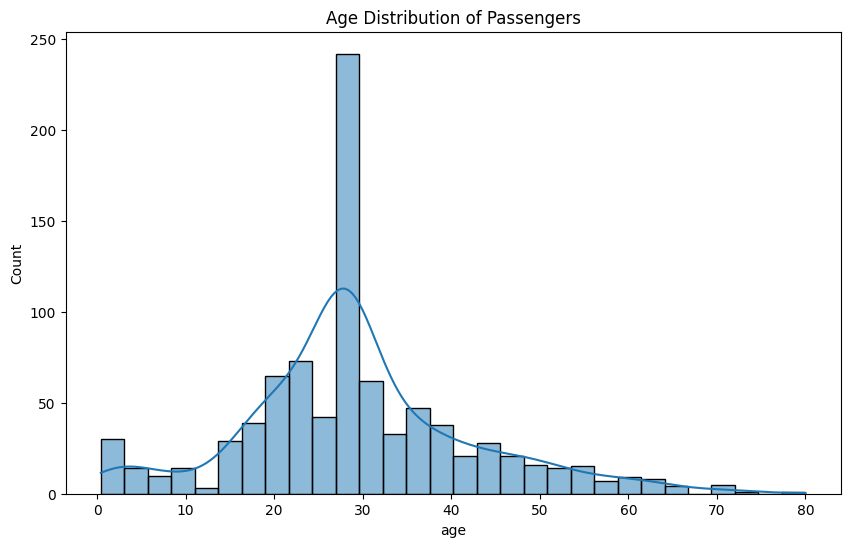

In [ ]:
# Plotting a histogram of the age distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

Next, let's compare the fares paid by passengers who survived vs. those who did not survive.

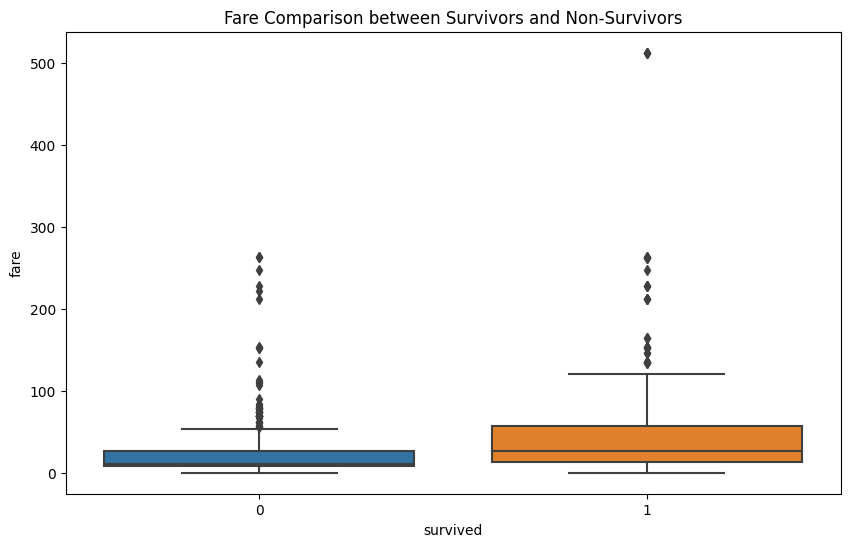

In [ ]:
# Box plot comparing the fares
plt.figure(figsize=(10,6))
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare Comparison between Survivors and Non-Survivors')
plt.show()

Next, let's create a heatmap to visualize the correlation among different numeric variables.

<ipython-input-8-06135bccbd58>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


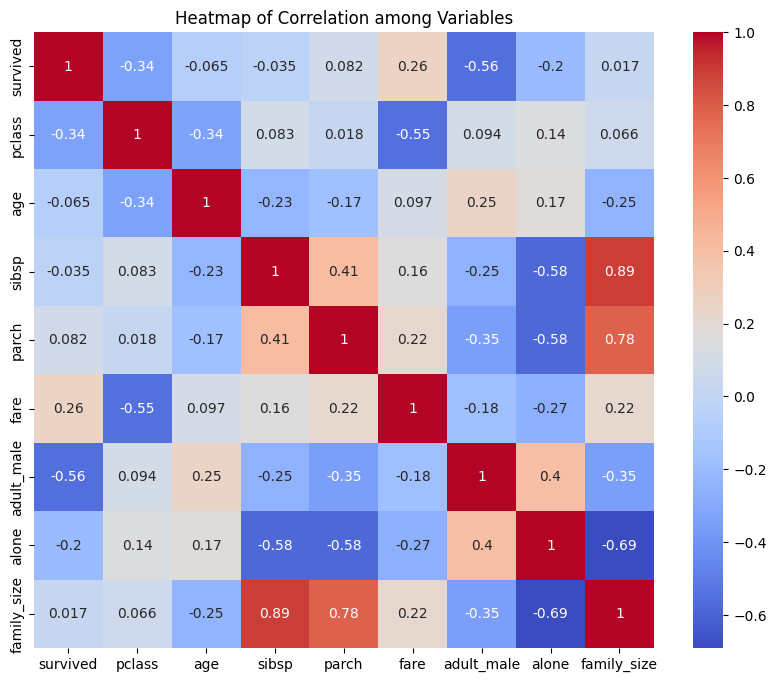

In [ ]:
# Creating a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation among Variables')
plt.show()

Finally, let's use a pairplot to observe the pairwise relationships between different classes of the 'survived' column.

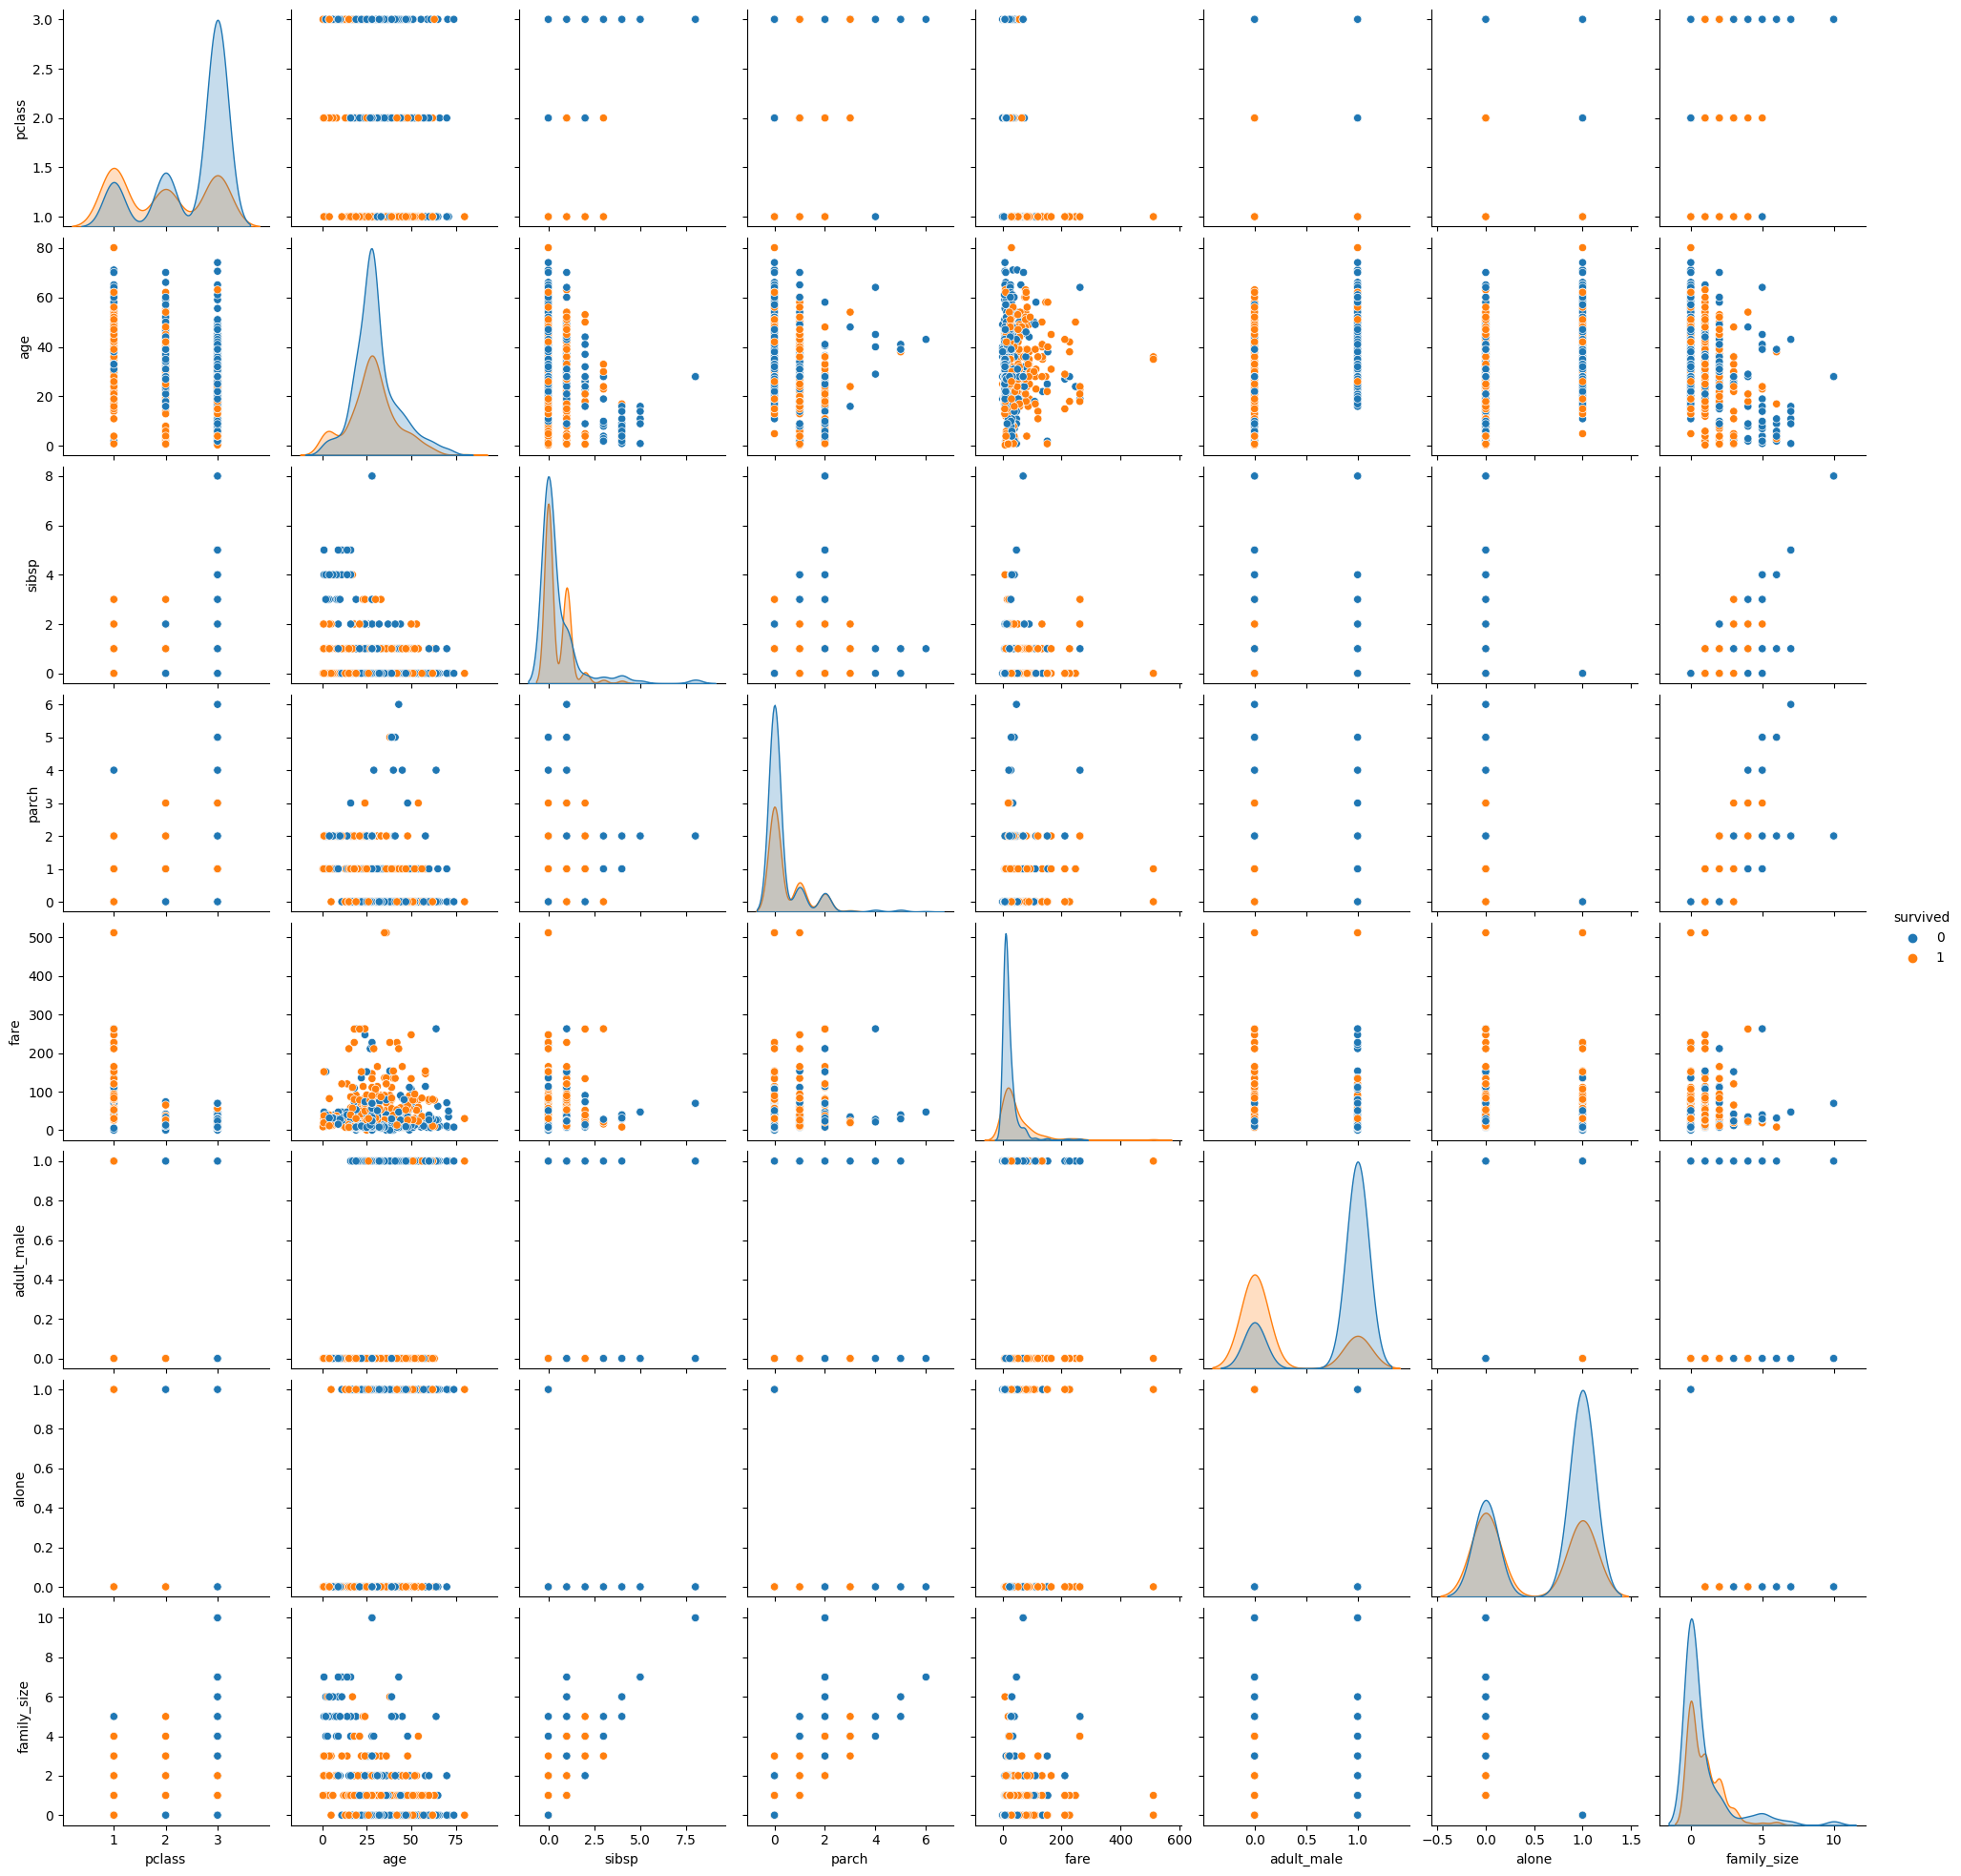

In [ ]:
# Creating a pairplot
sns.pairplot(df, hue='survived')
plt.show()
